In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from scipy.special import expit  # sigmoid 함수

from sklearn.neural_network import BernoulliRBM
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from dataset import Dataset

In [2]:
DATA_DIR = os.path.abspath("adsp-data/494_bus")
d = Dataset(DATA_DIR)
X = d.df

OSError: [Errno 9] Bad file descriptor: 'C:\\Work\\School\\Coding\\GitHub\\uml-hpc3_test\\adsp-inference\\adsp-data\\494_bus\\494_bus_gauss_0.00_0.00.mtx_1.json'

In [ ]:
X.to_excel("dataframe_494_bus_with_index.xlsx", index=True)

In [3]:
X = pd.read_excel("dataframe_494_bus_with_index.xlsx", index_col=0)
X

,branch-instructions,branch-misses,bus-cycles,cache-misses,unc_c_ring_ak_used.up_even,unc_c_ring_ak_used.up_odd,unc_c_ring_bl_used.all,l2_rqsts.all_demand_references,l2_rqsts.all_pf,l2_rqsts.all_rfo,...,l2_lines_out.demand_clean,unc_c_ring_ak_used.all,unc_c_ring_ak_used.down,unc_c_ring_ak_used.down_even,unc_c_ring_ak_used.down_odd,l2_lines_out.demand_dirty,l2_rqsts.all_code_rd,l2_rqsts.all_demand_data_rd,l2_rqsts.all_demand_miss,unc_c_ring_ak_used.up
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
0.0_0.0,260672366.0,330579.0,144792613.0,965303.0,28531599.8,24572764.9,122897926.3,2686184,4864048,997039,...,2726448,137330562.5,83349063.1,37948997.6,47188243.3,13079,240505,1454952,2045232,52845651.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0.1_0.06,250863429.5,332837.0,139218547.0,971695.5,27479690.1,24812467.2,123566719.2,2762965,5044125,1009405,...,2772113,136396155.9,83062217.7,36782333.1,46864140.0,25273,257743,1475990,2084802,53369201.7
0.1_0.07,243935316.0,332224.5,138084503.5,979994.0,28601909.5,24697362.5,125034216.5,2733947,4943392,1010497,...,2706935,136114357.4,84179052.7,37262142.1,47588735.4,42807,244875,1484210,2097834,52977104.1
0.1_0.08,250330380.0,331117.0,141210890.0,980939.5,28484942.1,24910258.1,122295079.3,2726120,4970150,1003911,...,2770895,137341151.5,84247285.9,36585310.5,46773550.6,37571,245023,1470336,2085445,52830541.1
0.1_0.09,257758261.5,333472.5,139637622.0,978840.0,28405114.9,25391065.6,122181270.4,2719340,4965523,1003700,...,2744895,136099410.0,83997180.6,36323451.0,46507653.2,25706,257035,1493277,2097495,53712902.3


In [4]:
y = np.array([float(i.split("_")[0]) * 100 for i in X.index])
y_binary = np.where(y == 0, 0, 1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y_binary, test_size=0.33, random_state=22)


In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
rbm = BernoulliRBM(n_components=100, learning_rate=0.06, n_iter=10, random_state=42)
rbm.fit(X_train_scaled)

BernoulliRBM(learning_rate=0.06, n_components=100, random_state=42)

In [10]:
X_hidden = rbm.transform(X_test_scaled)
X_reconstructed = expit(np.dot(X_hidden, rbm.components_) + rbm.intercept_visible_)

In [11]:
# Reconstruction error 계산
recon_error = np.mean((X_test_scaled - X_reconstructed)**2, axis=1)

# threshold = 상위 5% 이상
threshold = np.percentile(recon_error, 95)
y_pred = np.where(recon_error > threshold, 1, 0)


MSE: 0.4242, MAE: 0.4242, Accuracy: 0.5758, Precision: 1.0000, Recall: 0.1250, F1: 0.2222


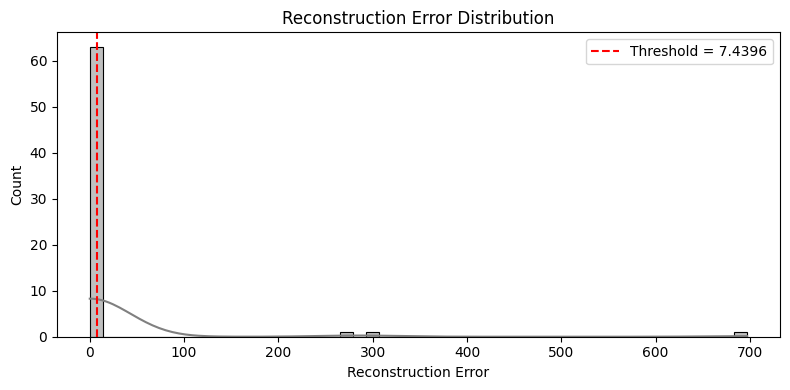

In [12]:
mse_metric = tf.keras.metrics.MeanSquaredError()
mae_metric = tf.keras.metrics.MeanAbsoluteError()
mse_metric.update_state(y_test, y_pred)
mae_metric.update_state(y_test, y_pred)

mse = mse_metric.result().numpy()
mae = mae_metric.result().numpy()
acc = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"MSE: {mse:.4f}, MAE: {mae:.4f}, Accuracy: {acc:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1: {f1:.4f}")

plt.figure(figsize=(8, 4))
sns.histplot(recon_error, bins=50, kde=True, color="gray")
plt.axvline(threshold, color="red", linestyle="--", label=f"Threshold = {threshold:.4f}")
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Count")
plt.legend()
plt.tight_layout()
plt.show()

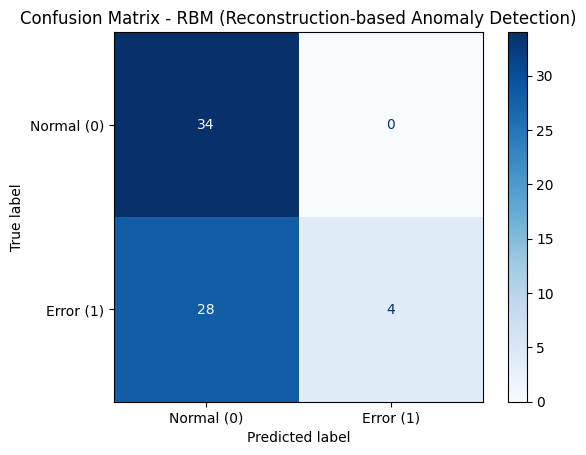

In [13]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Normal (0)", "Error (1)"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - RBM (Reconstruction-based Anomaly Detection)")
plt.show()